## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['svg.fonttype'] = 'none'
from matplotlib.collections import LineCollection
import statsmodels.api as sm
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

In [2]:
interruptions = pd.read_csv('flatfiles/merged_fields.csv')

In [3]:
chunks = pd.read_csv('flatfiles/chunks.csv')

## General

In [108]:
chunks.query('speaker_type == "A"').n_tokens.agg(['mean', 'median', 'count'])

mean          59.224911
median        28.000000
count     375250.000000
Name: n_tokens, dtype: float64

In [10]:
interruptions.groupby('justice_id').interruption_rate.agg(['mean', 'median', 'count']).sort_values(by='median')

,mean,median,count
justice_id,,,
j__harry_a_blackmun,4.603995,2.234640,872
j__warren_e_burger,5.022044,2.409639,1261
j__lewis_f_powell_jr,4.823409,2.955668,452
j__william_h_rehnquist,6.286052,3.300330,7210
j__william_j_brennan_jr,8.666856,4.914035,604
j__clarence_thomas,8.833652,5.347594,49
j__sandra_day_oconnor,9.213842,5.780347,5435
j__john_g_roberts_jr,8.980112,6.072874,4251
j__samuel_a_alito_jr,8.593342,6.097561,2065


In [3]:
print('Percent of chunks with a female advocate:')
interruptions.groupby('justice_id').gender.agg(['mean', 'count']).sort_values(by='mean', ascending=False)

Percent of chunks with a female advocate:


,mean,count
justice_id,,
j__samuel_a_alito_jr,0.167554,2065
j__clarence_thomas,0.163265,49
j__john_g_roberts_jr,0.160433,4251
j__elena_kagan,0.148888,1753
j__neil_gorsuch,0.147436,468
j__sonia_sotomayor,0.145869,2941
j__anthony_m_kennedy,0.145153,6159
j__david_h_souter,0.138889,4176
j__stephen_g_breyer,0.136857,6167


In [4]:
print('Most experienced advocates:')
interruptions.query('gender == True').groupby('advocate_id').experience.first().sort_values(ascending=False).head(20)

Most experienced advocates:


advocate_id
lisa_s_blatt            39
patricia_a_millett      32
nicole_saharsky         29
beth_s_brinkmann        24
barbara_d_underwood     21
maureen_e_mahoney       19
ann_oconnell            19
sarah_e_harrington      19
barbara_b_mcdowell      18
ginger_d_anders         17
amy_l_wax               14
rachel_p_kovner         14
deanne_e_maynard        14
elaine_j_goldenberg     12
kathryn_a_oberly        12
leondra_r_kruger        12
kathleen_m_sullivan     11
melissa_arbus_sherry    10
cornelia_t_l_pillard     9
pamela_s_karlan          9
Name: experience, dtype: int64

In [5]:
print('Most frequent female advocates:')
interruptions.query('gender == True').groupby('advocate_id').interruption_rate.count().sort_values(ascending=False).head(20)

Most frequent female advocates:


advocate_id
beth_s_brinkmann       248
lisa_s_blatt           245
patricia_a_millett     245
maureen_e_mahoney      171
nicole_saharsky        160
barbara_d_underwood    156
deanne_e_maynard       137
pamela_s_karlan        133
barbara_b_mcdowell     127
sarah_e_harrington     127
kathleen_m_sullivan    116
ann_oconnell           108
amy_l_wax               98
rachel_p_kovner         89
leondra_r_kruger        84
kathryn_a_oberly        74
elaine_j_goldenberg     71
ginger_d_anders         70
katherine_p_baldwin     65
caitlin_j_halligan      54
Name: interruption_rate, dtype: int64

In [6]:
print('Number of chunks per justice:')
interruptions.groupby('justice_id').chunk_no.count().sort_values(ascending=False)

Number of chunks per justice:


justice_id
j__antonin_scalia          12695
j__john_paul_stevens        8090
j__william_h_rehnquist      7210
j__stephen_g_breyer         6167
j__anthony_m_kennedy        6159
j__ruth_bader_ginsburg      6109
j__sandra_day_oconnor       5435
j__byron_r_white            5199
j__john_g_roberts_jr        4251
j__david_h_souter           4176
j__sonia_sotomayor          2941
j__samuel_a_alito_jr        2065
j__elena_kagan              1753
j__thurgood_marshall        1439
j__warren_e_burger          1261
j__harry_a_blackmun          872
j__william_j_brennan_jr      604
j__neil_gorsuch              468
j__lewis_f_powell_jr         452
j__brett_m_kavanaugh         381
j__clarence_thomas            49
Name: chunk_no, dtype: int64

In [7]:
print('Most interrupted advocates')
interruptions.groupby(['advocate_id', 'gender']).interruption_rate.agg(['mean', 'count']).sort_values(by='mean', ascending=False).head(20)

Most interrupted advocates


,,mean,count
advocate_id,gender,,
kelsi_b_corkran,True,81.397267,16
sopan_joshi,False,59.173138,15
beverly_van_ness,True,57.677810,21
gary_t_lafayette,False,56.603774,1
laura_k_grandy,True,55.476668,12
sebastian_kd_graber,False,55.193490,9
monica_knox,True,44.010944,13
eric_c_rassbach,False,43.807806,7
william_h_pryor_jr,False,42.637918,3


## Observed interruption rates

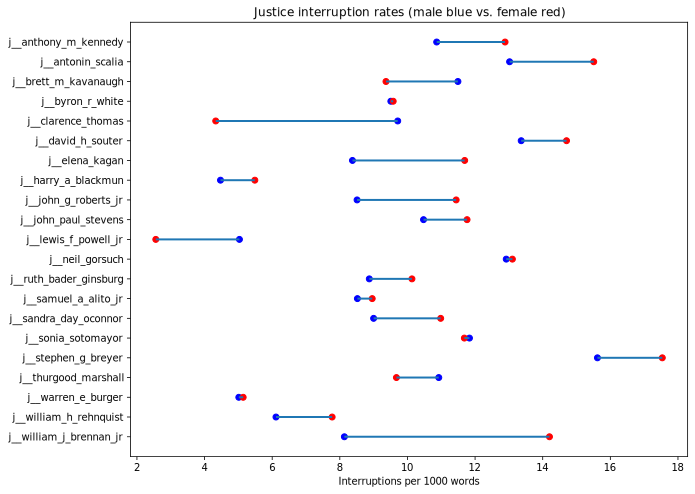

In [4]:
justice_interruption_rates = interruptions.groupby(['justice_id', 'gender']) \
  .interruption_rate.mean().unstack('gender').sort_index()

fig, ax = plt.subplots()
y_pos = np.arange(len(justice_interruption_rates))

lines = []
for i, j in enumerate(justice_interruption_rates.index):
  y = y_pos[i]
  xm = justice_interruption_rates.loc[j, False]
  xf = justice_interruption_rates.loc[j, True]
  plt.plot(xm, y, 'bo')
  plt.plot(xf, y, 'ro')
  lines.append([(xm, y), (xf, y)])
  
fig.set_size_inches(10, 8)
ax.add_collection(LineCollection(lines, linewidths=2))
ax.autoscale()

ax.set_yticks(y_pos, labels=justice_interruption_rates.index)
ax.invert_yaxis()
ax.set_xlabel('Interruptions per 1000 words')
ax.set_title('Justice interruption rates (male blue vs. female red)')

plt.show()

## Causal analysis

### Vanilla linear regression with controls

In [5]:
def compute_effects():
  justices = interruptions.justice_id.sort_values().unique()
  results = []
  for justice in justices:
    y = interruptions.query('justice_id == @justice').interruption_rate
    X = interruptions.query('justice_id == @justice')[['gender', 'do_align', 'experience']].copy()
    X = sm.add_constant(X).replace({ False: 0, True: 1 })
    reg = sm.OLS(y, X).fit()
    conf_int = reg.conf_int(alpha=0.05, cols=None).stack()
    conf_int.index = conf_int.index.map('conf_{0[0]}_{0[1]}'.format)
    
    res = pd.concat([reg.params, conf_int])
    res['justice'] = justice

    results.append(res)
    
  return pd.DataFrame(results).set_index('justice')

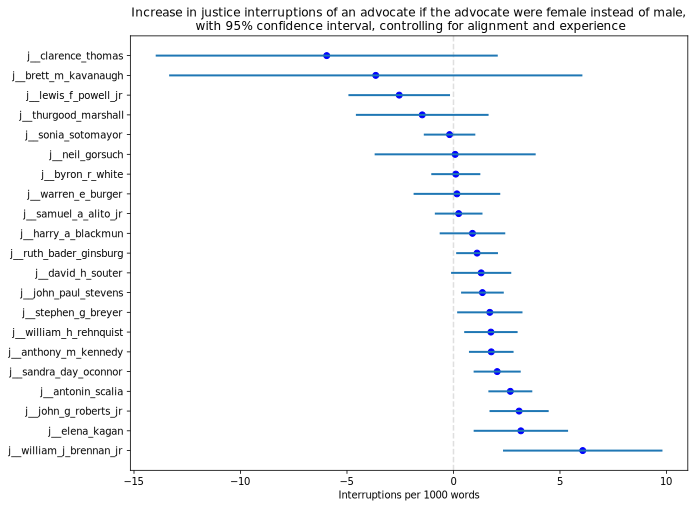

In [6]:
fig, ax = plt.subplots()
interruption_effects = compute_effects()
sorted_justices = interruption_effects.sort_values(by='gender').index
y_pos = np.arange(len(interruption_effects))

plt.axline((0, 0), (0, 1), color='gray', alpha=0.25, linestyle='dashed')

lines = []
for i, j in enumerate(sorted_justices):
  y = y_pos[i]
  x0 = interruption_effects.loc[j, 'conf_gender_0']
  x = interruption_effects.loc[j, 'gender']
  x1 = interruption_effects.loc[j, 'conf_gender_1']
  plt.plot(x, y, 'bo')
  lines.append([(x0, y), (x1, y)])

fig.set_size_inches(10, 8)
ax.add_collection(LineCollection(lines, linewidths=2))
ax.autoscale()

ax.set_yticks(y_pos, labels=sorted_justices)
ax.invert_yaxis()
ax.set_xlabel('Interruptions per 1000 words')
ax.set_title(
  'Increase in justice interruptions of an advocate '
  'if the advocate were female instead of male,\n'
  'with 95% confidence interval, controlling for alignment and experience')

plt.show()

### Sensitivity analysis

#### Dummy for each of the top female advocates

Are the most frequently observed female advocates 'special?' 
Looks like this doesn't make much of a difference.

In [11]:
top_female_advocates = interruptions.query('gender == True').groupby('advocate_id') \
  .interruption_rate.count().sort_values(ascending=False).head(10).index
interruptions_tfa = interruptions.copy()
for advocate in top_female_advocates:
  interruptions_tfa['is_' + advocate] = interruptions_tfa.advocate_id == advocate


In [12]:
def compute_effects_tfa():
  justices = interruptions.justice_id.sort_values().unique()
  results = []
  for justice in justices:
    y = interruptions_tfa.query('justice_id == @justice').interruption_rate
    covariates = ['gender', 'do_align', 'experience'] + ['is_' + advocate for advocate in top_female_advocates]
    X = interruptions_tfa.query('justice_id == @justice')[covariates].copy()
    X = sm.add_constant(X).replace({ False: 0, True: 1 })
    
    res = sm.OLS(y, X).fit().params
    res['justice'] = justice
    results.append(res)
    
  return pd.DataFrame(results).set_index('justice')

In [13]:
interruption_tfa_effects = compute_effects_tfa()
diff = interruption_effects.join(interruption_tfa_effects, rsuffix='_tfa')[['gender', 'gender_tfa']].round(2)
diff['diff'] = diff.gender_tfa - diff.gender
diff

,gender,gender_tfa,diff
justice,,,
j__anthony_m_kennedy,1.77,2.00,0.23
j__antonin_scalia,2.67,2.55,-0.12
j__brett_m_kavanaugh,-3.65,-4.58,-0.93
j__byron_r_white,0.11,-0.06,-0.17
j__clarence_thomas,-5.95,-5.77,0.18
j__david_h_souter,1.30,1.34,0.04
j__elena_kagan,3.16,1.99,-1.17
j__harry_a_blackmun,0.89,0.69,-0.20
j__john_g_roberts_jr,3.08,4.07,0.99


#### Test for heteroskedasticity

The graphs indicate significant heteroskedasticity.
Using the white test, reject homoskedasticity for about a third of justices.

TODO: scale male graph to female range. Exclude that one female node up at 80?

Text(0.06, 0.5, 'Advocate Mean Interruption Rate')

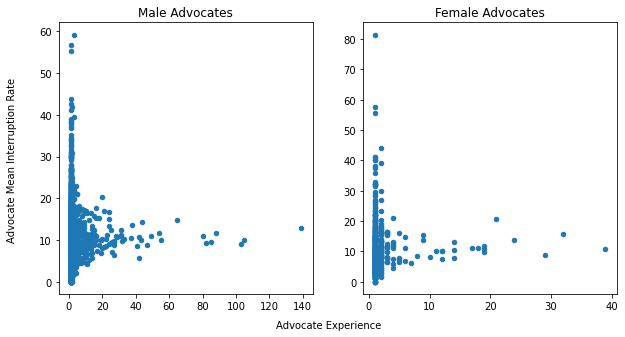

In [14]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
interruptions.query('gender == False').groupby('advocate_id').agg({ 'interruption_rate': 'mean', 'experience': 'first' }) \
  .plot.scatter(x='experience', y='interruption_rate', title='Male Advocates', ax=ax1)
ax1.set_xlabel('')
ax1.set_ylabel('')
interruptions.query('gender == True').groupby('advocate_id').agg({ 'interruption_rate': 'mean', 'experience': 'first' }) \
  .plot.scatter(x='experience', y='interruption_rate', title='Female Advocates', ax=ax2)
ax2.set_xlabel('')
ax2.set_ylabel('')
fig.text(0.5, 0.04, 'Advocate Experience', ha='center', va='center')
fig.text(0.06, 0.5, 'Advocate Mean Interruption Rate', ha='center', va='center', rotation='vertical')

In [15]:
from statsmodels.stats.diagnostic import het_white

def run_het_test():
  justices = interruptions.justice_id.sort_values().unique()
  results = []
  for justice in justices:
    y = interruptions.query('justice_id == @justice').interruption_rate
    X = interruptions.query('justice_id == @justice')[['gender', 'do_align', 'experience']].copy()
    X = sm.add_constant(X).replace({ False: 0, True: 1 })
    reg = sm.OLS(y, X).fit()
    
    res = het_white(reg.resid, X)
    results.append([justice, res[3]])
    
  return pd.DataFrame(results, columns=['justice', 'homo_f_pvalue']).set_index('justice')

In [16]:
homo_f_pvalues = run_het_test()
print('P-value for F test that Xs are homoskedastic:')
homo_f_pvalues['reject_at_5_pct'] = homo_f_pvalues.homo_f_pvalue < 0.05
print('Reject', homo_f_pvalues.reject_at_5_pct.sum(), 'at alpha = 0.05')
homo_f_pvalues.round(4).replace({False: ''}).sort_values(by='homo_f_pvalue') \
  .join(interruptions.groupby('justice_id').chunk_no.count().rename('n_chunks'))

P-value for F test that Xs are homoskedastic:
Reject 6 at alpha = 0.05


,homo_f_pvalue,reject_at_5_pct,n_chunks
justice,,,
j__elena_kagan,0.0000,True,1753
j__john_g_roberts_jr,0.0000,True,4251
j__ruth_bader_ginsburg,0.0007,True,6109
j__william_j_brennan_jr,0.0026,True,604
j__antonin_scalia,0.0097,True,12695
j__david_h_souter,0.0376,True,4176
j__sonia_sotomayor,0.1438,,2941
j__john_paul_stevens,0.2625,,8090
j__sandra_day_oconnor,0.3798,,5435


#### Outliers

The largest interruption rates coincide with the fewest number of chunks, suggesting that a small denominator might be getting scaled up.

Text(0.5, 0.04, 'Number of Chunks with Advocate')

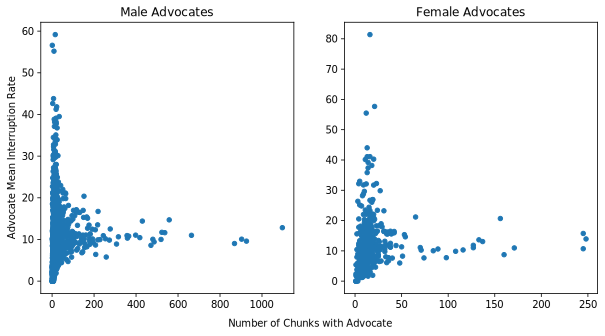

In [20]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
interruptions.query('gender == False').groupby('advocate_id').interruption_rate.agg(['mean', 'count']) \
  .plot.scatter(x='count', y='mean', title='Male Advocates', ax=ax1)
ax1.set_xlabel('')
ax1.set_ylabel('Advocate Mean Interruption Rate')
interruptions.query('gender== True').groupby('advocate_id').interruption_rate.agg(['mean', 'count']) \
  .plot.scatter(x='count', y='mean', title='Female Advocates', ax=ax2)
ax2.set_xlabel('')
ax2.set_ylabel('')
fig.text(0.5, 0.04, 'Number of Chunks with Advocate', ha='center', va='center')
# fig.text(0.06, 0.5, 'Advocate Mean Interruption Rate', ha='center', va='center', rotation='vertical')

#### Robust regression

In [9]:
def compute_robust_effects():
  justices = interruptions.justice_id.sort_values().unique()
  results = []
  for justice in justices:
    y = interruptions.query('justice_id == @justice').interruption_rate
    X = interruptions.query('justice_id == @justice')[['gender', 'do_align', 'experience']].copy()
    X = sm.add_constant(X).replace({ False: 0, True: 1 })
    reg = sm.RLM(y, X).fit()
    conf_int = reg.conf_int(alpha=0.05, cols=None).stack()
    conf_int.index = conf_int.index.map('conf_{0[0]}_{0[1]}'.format)
    res = pd.concat([reg.params, conf_int])
    res['justice'] = justice

    results.append(res)
    
  return pd.DataFrame(results).set_index('justice')

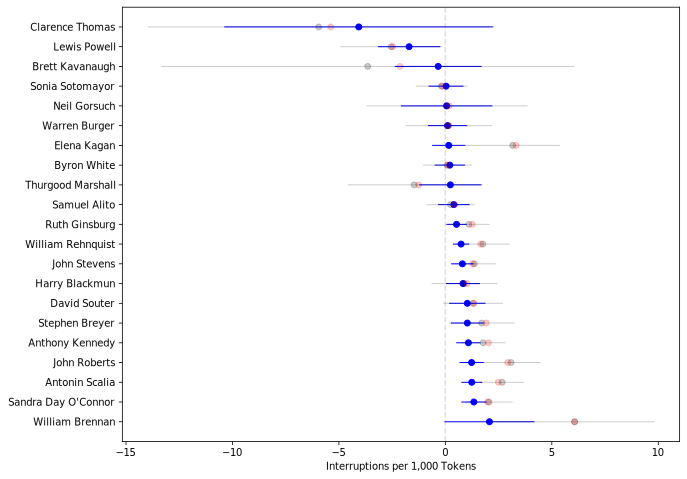

In [10]:
fig, ax = plt.subplots()
interruption_effects_robust = compute_robust_effects()
y_pos = np.arange(len(interruption_effects_robust))
sorted_justices = interruption_effects_robust.sort_values(by='gender').index

plt.axline((0, 0), (0, 1), color='gray', alpha=0.25, linestyle='dashed')

robust_lines = []
lines = []
for i, j in enumerate(sorted_justices):
  # plot robust
  y = y_pos[i]
  x0 = interruption_effects_robust.loc[j, 'conf_gender_0']
  x = interruption_effects_robust.loc[j, 'gender']
  x1 = interruption_effects_robust.loc[j, 'conf_gender_1']
  plt.plot(x, y, 'bo')
  robust_lines.append([(x0, y), (x1, y)])

  # plot regular
  y = y_pos[i]
  x0 = interruption_effects.loc[j, 'conf_gender_0']
  x = interruption_effects.loc[j, 'gender']
  x1 = interruption_effects.loc[j, 'conf_gender_1']
  plt.plot(x, y, 'ko', alpha=0.2)
  lines.append([(x0, y), (x1, y)])

  # plot difference in means
  y = y_pos[i]
  x = justice_interruption_rates.loc[j, True] - justice_interruption_rates.loc[j, False]
  plt.plot(x, y, 'ro', alpha=0.2)
  

fig.set_size_inches(10, 8)

ax.add_collection(LineCollection(robust_lines, linewidths=1, color='b'))
ax.add_collection(LineCollection(lines, linewidths=1, alpha=0.2, color='k'))
ax.autoscale()

def to_justice_name(id):
  parts = id.replace('_jr', '').replace('j__', '').split('_')
  return ' '.join([parts[0].capitalize(), parts[-1].capitalize()]).replace('Oconnor', 'Day O\'Connor')

ax.set_yticks(y_pos, labels=sorted_justices.map(to_justice_name))
ax.invert_yaxis()
ax.set_xlabel('Interruptions per 1,000 Tokens')
# ax.set_title('Average Treatment Effect of Being Female')

# plt.figtext(
#   0.99, 
#   0.01, 
#   'Robust regression in blue and non-robust (vanilla OLS) in gray. 95% confidence intervals shown.\n'
#   'Controlling for alignment and experience.',
#   horizontalalignment='right'
# )

plt.show()

In [116]:
(interruption_effects_robust.gender.abs() <= 2).agg(['sum', 'count'])

sum      19
count    21
Name: gender, dtype: int64

In [98]:
justices = [
  'kagan', 'sotomayor', 'marshall', 'burger', 'stevens', 'white', 'alito', 
  'rehnquist', 'breyer', 'ginsburg', 'souter', 'scalia', 'kennedy', 'roberts', 'oconnor'
]
for j in justices:
  v = interruption_effects_robust[interruption_effects_robust.index.str.contains(j)].iloc[0].gender
  print(j, v)

kagan 0.15964726906440965
sotomayor 0.03259849963920419
marshall 0.2353223597407277
burger 0.10161123504105773
stevens 0.7992886026150321
white 0.2105191424168174
alito 0.39789815137719
rehnquist 0.7379064183616897
breyer 1.0309421874900464
ginsburg 0.5227302697155816
souter 1.0302643057398322
scalia 1.2401598990382978
kennedy 1.0796790228789064
roberts 1.2317964660412568
oconnor 1.336867207869322


## Reliance

### Computations

In [11]:
def get_params(interruptions):
  Y = interruptions.interruption_rate
  X = interruptions[['gender', 'do_align', 'experience']].copy()
  X = sm.add_constant(X).replace({ False: 0, True: 1 })
  reg = sm.RLM(Y, X).fit()
  return reg.params

In [12]:
L = lambda y, y_hat: np.square(y - y_hat)
def categorical_loss(interruptions, col):
  Y = interruptions.interruption_rate
  X = interruptions[['gender', 'do_align', 'experience']].copy()
  X = sm.add_constant(X).replace({ False: 0, True: 1 })
  reg = sm.RLM(Y, X).fit()

  interruptions = interruptions.copy()
  x1_cats = interruptions[col].sort_values().unique()

  running_sums = 0
  for c in x1_cats:
    X_c = X.copy()
    X_c[col] = c
    L_c = L(Y, reg.predict(X_c))
    # whatever the mult is for this c -- if x1i = c then nc - 1 else nc
    m_c = pd.Series((interruptions[col] == c).sum(), index=L_c.index)
    m_c.loc[interruptions[col] == c] -= 1
    
    running_sums += (m_c * L_c).sum()
  
  n = len(interruptions)
  avg_loss = 1 / (n * (n - 1)) * running_sums
  return avg_loss

In [13]:
def baseline_loss(interruptions):
  Y = interruptions.interruption_rate
  X = interruptions[['gender', 'do_align', 'experience']].copy()
  X = sm.add_constant(X).replace({ False: 0, True: 1 })
  reg = sm.RLM(Y, X).fit()
  return L(Y, reg.predict(X)).mean()

In [14]:
rs = []
betas = []
cols = ['gender', 'do_align', 'experience']
for justice in interruptions.justice_id.unique():
  inter = interruptions.query('justice_id == @justice')
  rs.append([justice] + [categorical_loss(inter, col) for col in cols])
  params = get_params(inter)
  params['justice_id'] = justice
  betas.append(params)
rs = pd.DataFrame(rs, columns=['justice_id'] + cols).set_index('justice_id')
betas = pd.DataFrame(betas, columns=['justice_id'] + cols).set_index('justice_id')

In [15]:
bs = []
for justice in interruptions.justice_id.unique():
  inter = interruptions.query('justice_id == @justice')
  bs.append([justice, baseline_loss(inter)])
bs = pd.DataFrame(bs, columns=['justice_id', 'baseline']).set_index('justice_id').baseline

In [16]:
reliances = pd.DataFrame(index=rs.index)
for col in rs.columns:
  reliances[col] = rs[col] - bs

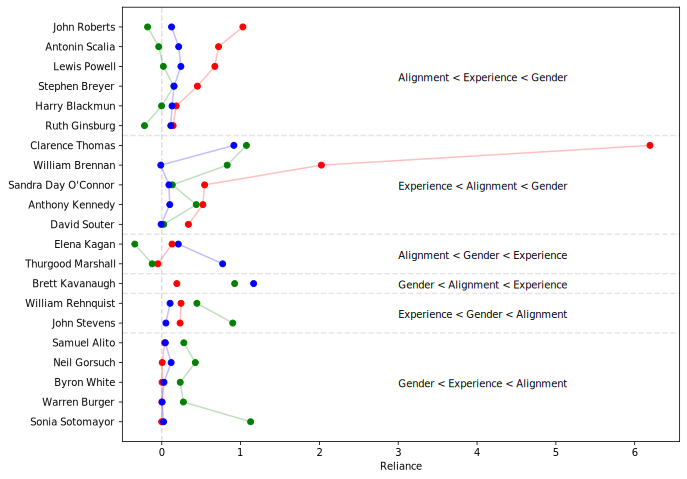

In [27]:
fig, ax = plt.subplots()
y_pos = np.arange(len(reliances))
cols = ['gender', 'do_align', 'experience']
def rank(df):
  return ' < '.join(df.sort_values(ascending=True).index)

sorted_reliances = reliances.copy()
sorted_reliances['rank'] = sorted_reliances.apply(rank, axis=1)
sorted_reliances['rank_rev'] = sorted_reliances['rank'].str.split(' < ').str[::-1].str.join(' > ')

sorted_reliances = sorted_reliances.sort_values(by=['rank_rev'] + cols, ascending=False)
sorted_reliances['y'] = y_pos

plt.axline((0, 0), (0, 1), color='gray', alpha=0.25, linestyle='dashed')

for r in sorted_reliances['rank'].unique():
  df = sorted_reliances.query('rank == @r').copy()
  max_y = max(df.y)
  inc = (y_pos[0] + y_pos[1]) / 2
  
  text = r.replace('gender', 'Gender').replace('do_align', 'Alignment').replace('experience', 'Experience')
  plt.text(3, df.y.mean() + 0.25, text)


  if max(y_pos) != max(df.y):
    plt.axline((-0.5, max(df.y) + inc), (2, max(df.y) + inc), color='gray', alpha=0.2, linestyle='dashed')
  for col, color in zip(cols, 'rgb'):
    df.set_index(col).y.plot.line(ax=ax, color=color, alpha=0.25)

for i in range(len(sorted_reliances)):
  for col, color in zip(cols, 'rgb'):
    plt.plot(sorted_reliances.iloc[i][col], y_pos[i], color + 'o')

fig.set_size_inches(10, 8)
ax.autoscale()

def to_justice_name(id):
  parts = id.replace('_jr', '').replace('j__', '').split('_')
  return ' '.join([parts[0].capitalize(), parts[-1].capitalize()]).replace('Oconnor', 'Day O\'Connor')

ax.set_yticks(y_pos, labels=sorted_reliances.index.map(to_justice_name))
ax.invert_yaxis()
ax.set_xlabel('Reliance')
ax.set_xlim(-0.5, 6.57)
plt.savefig('out.svg')

In [22]:
reliances.sort_values(by='gender', ascending=False)

,gender,do_align,experience,biggest_col
justice_id,,,,
j__clarence_thomas,6.194115,1.074321,0.914656,gender
j__william_j_brennan_jr,2.024609,0.830177,-0.012736,gender
j__john_g_roberts_jr,1.028896,-0.179966,0.124092,gender
j__antonin_scalia,0.720167,-0.038943,0.214415,gender
j__lewis_f_powell_jr,0.673571,0.019986,0.242610,gender
j__sandra_day_oconnor,0.543206,0.133488,0.090279,gender
j__anthony_m_kennedy,0.521350,0.437427,0.101282,gender
j__stephen_g_breyer,0.452215,0.153670,0.155556,gender
j__david_h_souter,0.337769,0.024470,-0.008472,gender


In [26]:
interruptions[['gender', 'do_align']].corr()

,gender,do_align
gender,1.00000,-0.00375
do_align,-0.00375,1.00000


In [27]:
rel = pd.concat({ 'reliances': reliances[['gender', 'experience', 'do_align']], ' ': pd.Series(' ', index=reliances.index, name=' '), 'betas': abs(betas)[['gender', 'experience', 'do_align']] }, axis=1) \
  .sort_values(by=('betas', 'experience'), ascending=False) \
  # .drop(labels='j__clarence_thomas')
rel.index = rel.index.map(to_justice_name)
# print(rel.to_latex())
rel.style.apply(lambda r: ['background:yellow'] * len(r) if abs(r[('betas', 'gender')]) < abs(r[('betas', 'do_align')]) else [None] * len(r), axis=1)
# rel.style \
#   .background_gradient(axis=None, subset='reliances', cmap='copper') \
#   .background_gradient(axis=None, subset='abs(betas)', cmap='copper')